In [ ]:
#Sosyal Medya Reklamları Veri Seti

"""
Çeşitli kullanıcıların verilerine göre reklama tıklayıp tıklamayacğını
tahmin eden ann modeli projesi

"""

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Social_Network_Ads.csv to Social_Network_Ads.csv


In [ ]:
import pandas as pd

df= pd.read_csv("Social_Network_Ads.csv")

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
#Veri Önişleme

df.drop("User ID",axis=1,inplace=True)
#id sütunu işe yaramaz atılabilir

df["Gender"]=df["Gender"].map({"Female":0, "Male":1})
#cinsiyeti sayısala çevirebiliriz 0 erkek 1 kadın

df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [ ]:
#Eğitim test verisi ayırma ve ölçekleme

from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import StandardScaler


X=df.drop("Purchased",axis=1)
y=df["Purchased"]
#girdi ve hedeflerin ayarlanması

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)
#%80 e %20 eğitim ve test verisi olarak ayarlanması

scaler=StandardScaler()
#sayısal değerleri lçekleyebilmek için

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)



In [ ]:
#ANN modeli oluşturma ve eğitme

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense

model=Sequential()

#model başlatma

model.add(Dense(16,activation='relu',input_shape=(X_train_scaled.shape[1],)))
#giriş katmanı 3 özelik gizli katman

model.add(Dense(8,activation='relu'))
#2. gizli katman

model.add(Dense(1, activation='sigmoid'))
#çıkış katmanı

In [ ]:
#Modeli Derleme

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#Model Eğitme

history=model.fit(

                  X_train_scaled,#ölçeklenmiş eğitim verisi
                  y_train,
                  epochs=50,   # 50 kez model eğitimi
                  batch_size=16,  # her adımda 16 örnek
                  validation_split=0.1,  #%10 u test için ayrıldı verilerin
                  verbose=1
)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4101 - loss: 0.7387 - val_accuracy: 0.2500 - val_loss: 0.7425
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4835 - loss: 0.6980 - val_accuracy: 0.5000 - val_loss: 0.6993
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6377 - loss: 0.6548 - val_accuracy: 0.6562 - val_loss: 0.6610
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6849 - loss: 0.6374 - val_accuracy: 0.7500 - val_loss: 0.6289
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7510 - loss: 0.5930 - val_accuracy: 0.8125 - val_loss: 0.5992
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7772 - loss: 0.5772 - val_accuracy: 0.8125 - val_loss: 0.5700
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8088 - loss: 0.5340 - val_accuracy: 0.8125 - val_loss: 0.5423
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8412 - loss: 0.4867 - val_accuracy: 0.8438 - val_loss

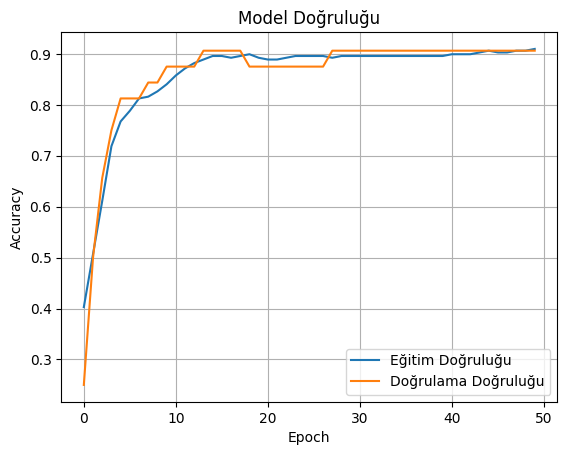

In [ ]:
#Eğitim Doğruluğunu Görselleştirme

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'],label='Doğrulama Doğruluğu')
plt.title("Model Doğruluğu")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

In [ ]:
#Model Testi ve Değerlendirme

y_pred_prob = model.predict(X_test_scaled)
#test verisiyle tahmin yap

y_pred= (y_pred_prob>0.5).astype(int)
#olasılık değerlerini 0 ve 1 e çevir




3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [ ]:
#Değerlendirme Metriklerini Hesaplama

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

print("Test Doğruluğu",accuracy_score(y_test, y_pred))

print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))

print("Classification Report:\n",classification_report(y_test,y_pred))

Test Doğruluğu 0.925
Confusion Matrix:
 [[48  4]
 [ 2 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.87      0.93      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



In [ ]:
#Kullanıcıdan Girdi Alma ve Tahmin Etme

import numpy as np

gender=int(input("Cinsiyet Giriniz (Kadın=>0, Erkek0>1)"))

age=int(input("Yaşınızı Giriniz:"))

salary= int(input("Aylık tahmini gelirinizi giriniz:"))

new_input = np.array([[gender,age,salary]])

#verinin listeye alınması

new_input_scaled= scaler.transform(new_input)
#scalerize edilmesi

prediction=model.predict(new_input_scaled)

if prediction >0.5:
  print("Tahmin: Bu Kullanıcı Reklama TIKLAR")

else:
  print("Tahmin Bu Kulalnıcı Reklama TIKLAMAZ")

Cinsiyet Giriniz (Kadın=>0, Erkek0>1)0
Yaşınızı Giriniz:45
Aylık tahmini gelirinizi giriniz:5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Tahmin: Bu Kullanıcı Reklama TIKLAR


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
"""
ANN modeli kendini veri setinden yüksek yaş grubu ve yüksek gelirli kişilerin
bu reklama tıklayacğı şeklinde eğitmiş

cinsiyet kategorisi çok da özele benzemiyor sınırlar hariç

"""

'\nANN modeli kendini veri setinden yüksek yaş grubu ve yüksek gelirli kişilerin\nbu reklama tıklayacğı şeklinde eğitmiş\n\ncinsiyet kategorisi çok da özele benzemiyor sınırlar hariç\n\n'